# Sentiment Classification


### Generate Word Embeddings and retrieve outputs of each layer with Keras based on Classification task

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation.

It is a distributed representation for text that is perhaps one of the key breakthroughs for the impressive performance of deep learning methods on challenging natural language processing problems.

We willl use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). 



### Dataset

`from keras.datasets import imdb`

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training, using a max vocab size of 10,000.

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


### Aim

1. Import test and train data  
2. Import the labels ( train and test) 
3. Get the word index and then Create key value pair for word and word_id. (12.5 points)
4. Build a Sequential Model using Keras for Sentiment Classification task. (10 points)
5. Report the Accuracy of the model. (5 points)  
6. Retrive the output of each layer in keras for a given single test sample from the trained model you built. (2.5 points)


#### Usage:

In [0]:

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN,GRU, Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import numpy as np
#import keras

In [16]:
!pip install numpy==1.16.1
import numpy as np
#This version of numpy has the default value of allow_pickle as True.

     |████████████████████████████████| 17.0MB 197kB/s 
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.15.0 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.1+cu100 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4


In [1]:
from keras.datasets import imdb

vocab_size = 10000 #vocab size

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size) # vocab_size is no.of words to consider from the dataset, ordering based on frequency.

Using TensorFlow backend.


In [0]:
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 300  #number of word used from each review

In [0]:
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [4]:
print(x_test.size,x_train.size)


(7500000, 7500000)


In [5]:
print(y_train,y_test)


(array([1, 0, 0, ..., 0, 1, 0]), array([0, 1, 1, ..., 0, 0, 0]))


## Build Keras Embedding Layer Model
We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexible and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [6]:

data= imdb.get_word_index()
#word_index = imdb.get_word_index()
for (k,v) in data.items():
  data[k] = v + 3
index_word = {}
index_word[0] = "PAD"
index_word[1] = "START"
index_word[2] = "OOV"
for (k,v) in data.items():
  index_word[v] =k

print(index_word)

1654784/1641221 [==============================] - 0s 0us/step
{0: 'PAD', 1: 'START', 2: 'OOV', 4: u'the', 5: u'and', 6: u'a', 7: u'of', 8: u'to', 9: u'is', 10: u'br', 11: u'in', 12: u'it', 13: u'i', 14: u'this', 15: u'that', 16: u'was', 17: u'as', 18: u'for', 19: u'with', 20: u'movie', 21: u'but', 22: u'film', 23: u'on', 24: u'not', 25: u'you', 26: u'are', 27: u'his', 28: u'have', 29: u'he', 30: u'be', 31: u'one', 32: u'all', 33: u'at', 34: u'by', 35: u'an', 36: u'they', 37: u'who', 38: u'so', 39: u'from', 40: u'like', 41: u'her', 42: u'or', 43: u'just', 44: u'about', 45: u"it's", 46: u'out', 47: u'has', 48: u'if', 49: u'some', 50: u'there', 51: u'what', 52: u'good', 53: u'more', 54: u'when', 55: u'very', 56: u'up', 57: u'no', 58: u'time', 59: u'she', 60: u'even', 61: u'my', 62: u'would', 63: u'which', 64: u'only', 65: u'story', 66: u'really', 67: u'see', 68: u'their', 69: u'had', 70: u'can', 71: u'were', 72: u'me', 73: u'well', 74: u'than', 75: u'we', 76: u'much', 77: u'been', 78: u'

In [7]:
data['dinosaur']


4457

In [8]:
data['age']


559

In [9]:

from keras import Sequential ,Model
from keras.layers import Embedding, Dense, LSTM, Dropout,SpatialDropout1D

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

W1231 16:47:25.068233 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1231 16:47:25.078912 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1231 16:47:25.086316 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1231 16:47:25.106823 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1231 16:47:25.116380 140310821967744 depr

In [13]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 100)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])


W1231 16:47:29.433886 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1231 16:47:29.457698 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1231 16:47:29.462625 140310821967744 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
result= model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))


W1231 16:47:31.855694 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1231 16:47:31.880022 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W1231 16:47:31.927032 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W1231 16:47:31.932018 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1231 16:47:31.932837 140310821967744 module_wrapper.py:139] From /usr/local/li

Train on 25000 samples, validate on 25000 samples
Epoch 1/5


W1231 16:47:33.337717 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1231 16:47:33.338912 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1231 16:47:33.452492 140310821967744 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



25000/25000 [==============================] - 113s 5ms/step - loss: 0.5110 - acc: 0.7553 - val_loss: 0.3885 - val_acc: 0.8309
Epoch 2/5
25000/25000 [==============================] - 101s 4ms/step - loss: 0.3616 - acc: 0.8498 - val_loss: 0.4486 - val_acc: 0.7912
Epoch 3/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.3270 - acc: 0.8720 - val_loss: 0.3241 - val_acc: 0.8649
Epoch 4/5
25000/25000 [==============================] - 99s 4ms/step - loss: 0.2952 - acc: 0.8860 - val_loss: 0.3063 - val_acc: 0.8731
Epoch 5/5
25000/25000 [==============================] - 100s 4ms/step - loss: 0.2647 - acc: 0.8991 - val_loss: 0.3051 - val_acc: 0.8745


In [14]:
score, accu= model.evaluate(x_test, y_test, batch_size=32)
print(accu)

25000/25000 [==============================] - 61s 2ms/step
0.87452


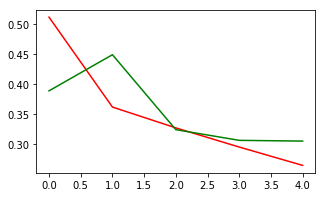

In [15]:
import matplotlib.pyplot as plt

#Plotting the loss of the training data and test data

plt.figure(figsize=(5,3))
plt.plot(result.epoch,result.history['loss'], label='training', color='red')
plt.plot(result.epoch,result.history['val_loss'], label='validation', color='green')

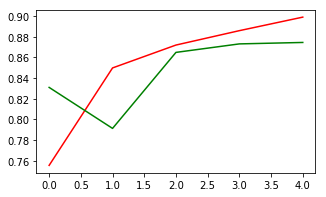

In [16]:
#plot the accuracy of the training data and test data
plt.figure(figsize=(5,3))
plt.plot(result.epoch,result.history['acc'], label='training', color='red')
plt.plot(result.epoch,result.history['val_acc'], label='validation', color='green')

## Retrive the output of each layer in keras for a given single test sample from the trained model you built

In [17]:
Layer_list =[]
for layer in model.layers:
    Layer_list.append(layer.name)
print(Layer_list)

['embedding_1', 'spatial_dropout1d_1', 'lstm_1', 'dense_1']


In [0]:
output1 = model.get_layer(Layer_list[0]).output
output2 = model.get_layer(Layer_list[1]).output
output3 = model.get_layer(Layer_list[2]).output

Intermediate_layer_model = Model(inputs=model.input,outputs=[output1,output2,output3])
IO = Intermediate_layer_model.predict(x_test[0])

In [19]:

print("Embedding Layer Output",IO[0])
print("LSTM",IO[1])
print("Dense",IO[2])

('Embedding Layer Output', array([[[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],

       [[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],

       [[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],

       ...,

       [[-0.05327104, -0.00121605, -0.02378437, ..., -0.00636537,
          0.01376377,  0.00596105]],

       [[ 0.04865405,  0.02401106,  0.04595907, ...,  0.03308899,
          0.02537323, -0.01025215]],

       [[ 0.01594402,  0.04567407, -0.00690959, ..., -0.0333556 ,
          0.08636034, -0.02305264]]], dtype=float32))
('LSTM', array([[[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],

       [[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],

       [[ 0.04073252,  0.03224496,  0.03054321, ...,  0.02206773,
          0.01522111,  0.06209266]],
